## Part 2: Visual Analysis

In this section, I will go over some visualizations of the data and deliver input.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set() #loads color palette for seaborn
np.random.seed(123) #ensures that random example is consistent every time

spotify = pd.read_csv('/Users/jarek/Spotify project/SpotifyAnalysis.csv')
spotify = spotify[spotify['popularity'] >= 80]
spotify = spotify.drop(spotify.columns[0], axis = 1)
s_sample = spotify.sample(1000)
s_sample.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20300,4v7DCN09hgXkKazefkznDQ,Akon,Trouble Deluxe Edition,Lonely,81,235800,True,0.634,0.526,5,-7.881,0,0.0333,0.33900,0.00000,0.257,0.623,90.087,4,dance
88350,6RtPijgfPKROxEzTHNRiDp,MAGIC!,Don't Kill the Magic,Rude,81,224840,False,0.773,0.758,1,-4.993,1,0.0381,0.04220,0.00000,0.305,0.925,144.033,4,reggae
89412,5fwSHlTEWpluwOM0Sxnh5k,Farruko,Pepas,Pepas,86,287120,True,0.762,0.766,7,-3.955,1,0.0343,0.00776,0.00007,0.128,0.442,130.001,4,reggaeton
85106,6GG73Jik4jUlQCkKg9JuGO,Jimmy Eat World,Bleed American,The Middle,81,165853,False,0.643,0.849,2,-5.428,1,0.0526,0.03710,0.00000,0.058,0.903,162.152,4,punk-rock
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.01770,0.101,0.398,124.053,4,alternative


This code establishes the libraries necessary to create visualizations, as well as imports the CSV dataset. For my first approach, I opted for a random sample of 1000 songs at or above a popularity score of 80. I also dropped a nameless column that had include itself in the dataset.

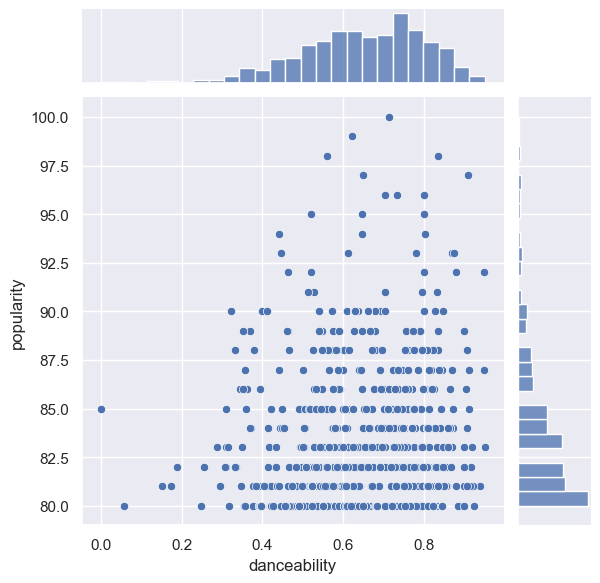

In [8]:
sns.jointplot(data=spotify, x="danceability", y="popularity", kind='scatter')

For this visualization, I did a joint scatterplot histogram relating a song's danceability score onto its popularity. Immediately, one can identify the potential normal distribution of danceable songs within the sample peaking in the .6-.7 range. This supports the notion that an essential component of popular songs is above average danceability. I was hoping to find a trend within the distribution of popularity, but was disappointed to find that, reasonably, the majority of the songs within the sample laid within the mid 80's range. Because of this, I decided to revise my apporach.

In [13]:
pop_tier_3 = (spotify['popularity'] >= 80) & (spotify['popularity'] < 85)
pop_tier_2 = (spotify['popularity'] >= 85) & (spotify['popularity'] < 90)
pop_tier_1 = (spotify['popularity'] >= 90)

tier_3 = spotify[pop_tier_3]
tier_2 = spotify[pop_tier_2]
tier_1 = spotify[pop_tier_1]

print(len(tier_1),len(tier_2), len(tier_3))

tier_2_sample = tier_2.sample(98)
tier_3_sample = tier_3.sample(98)

98 274 829


I organized the data into tiers of popularity, with tier one being the most popular songs with a 90 or above ranking, tier two being the high end of the 80's and tier one being the remaining low end. In order to maintain comparability,